In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.ffs import FFS
from scipy.stats import gaussian_kde
import scipy.stats as sps

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df_wine = pd.read_csv('data/wine.csv')

In [3]:
continents = list(df_wine['continent'].unique()[:-1])
continents.sort()

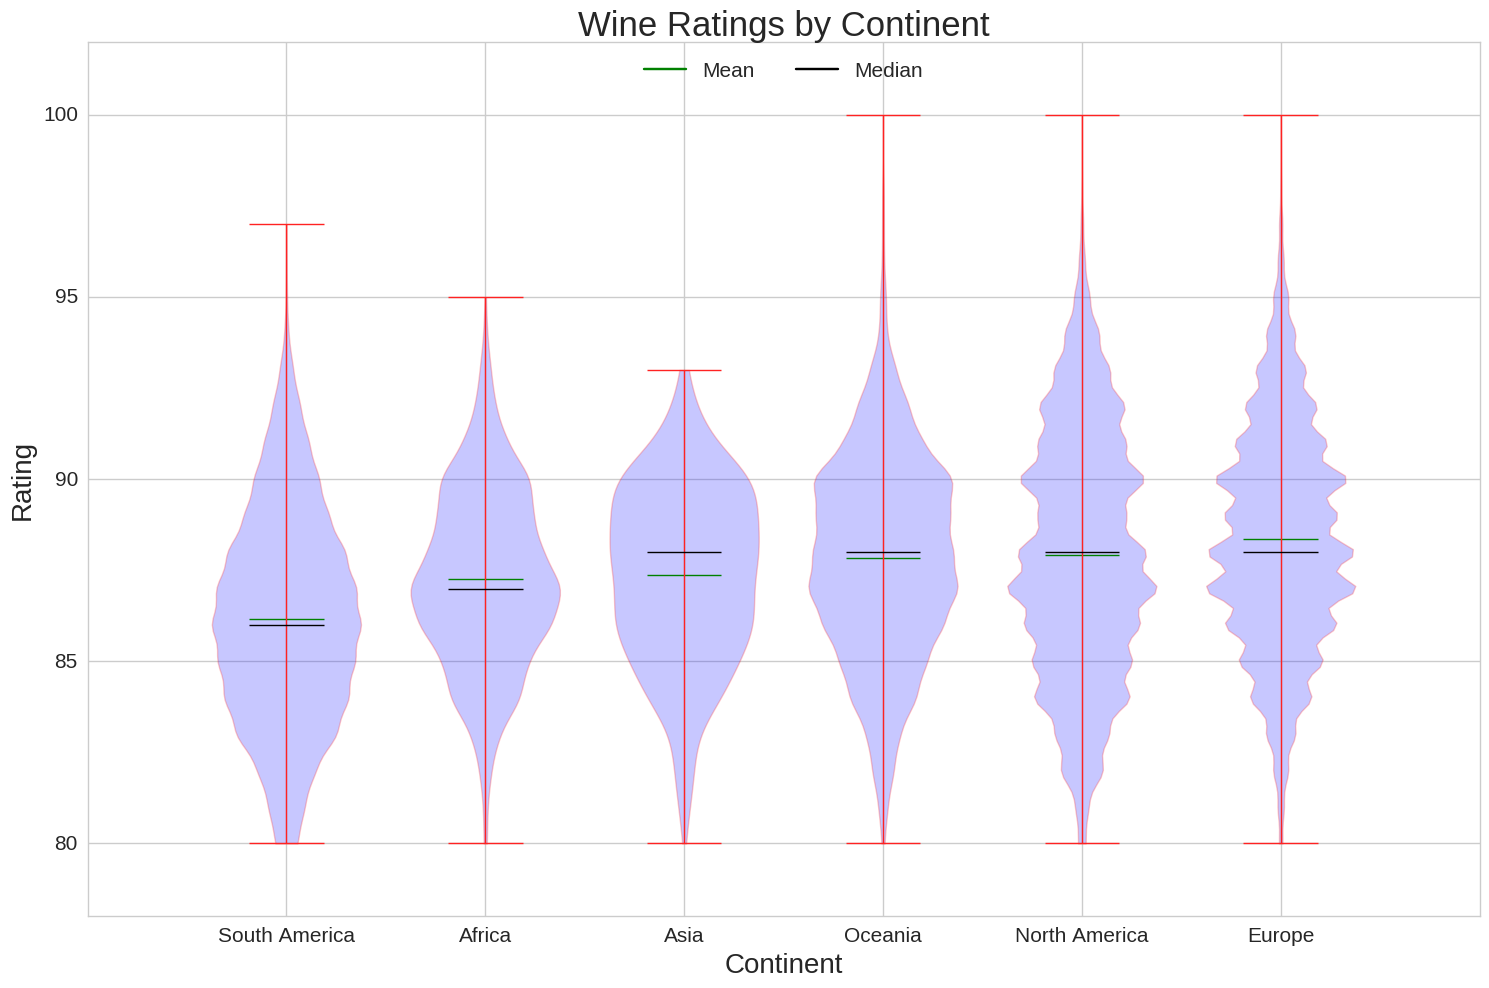

In [5]:
# continents = list(df_wine['continent'].unique()[:-1])
# continents.sort()
continents = np.array(df_wine['continent'].unique()[:-1])

a = df_wine.groupby('continent')[['points']].mean()
a = a[a.index.isin(continents)]
continents = list(a.index[np.argsort(np.array(a['points']))])

data = []
for continent in continents:
    data.append( np.array( df_wine[df_wine['continent'] == continent]['points'] ) )

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

ax.set_xticks(pos)
ax.set_xticklabels(continents)
ax.set_xlabel("Continent", fontsize = 20)
# ax.set_xticklabels(continents, rotation = "vertical")
# ax.set_xticklabels(continents, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by Continent", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)

plt.tight_layout()
plt.show()
fig.savefig("images/continents_violin.png")

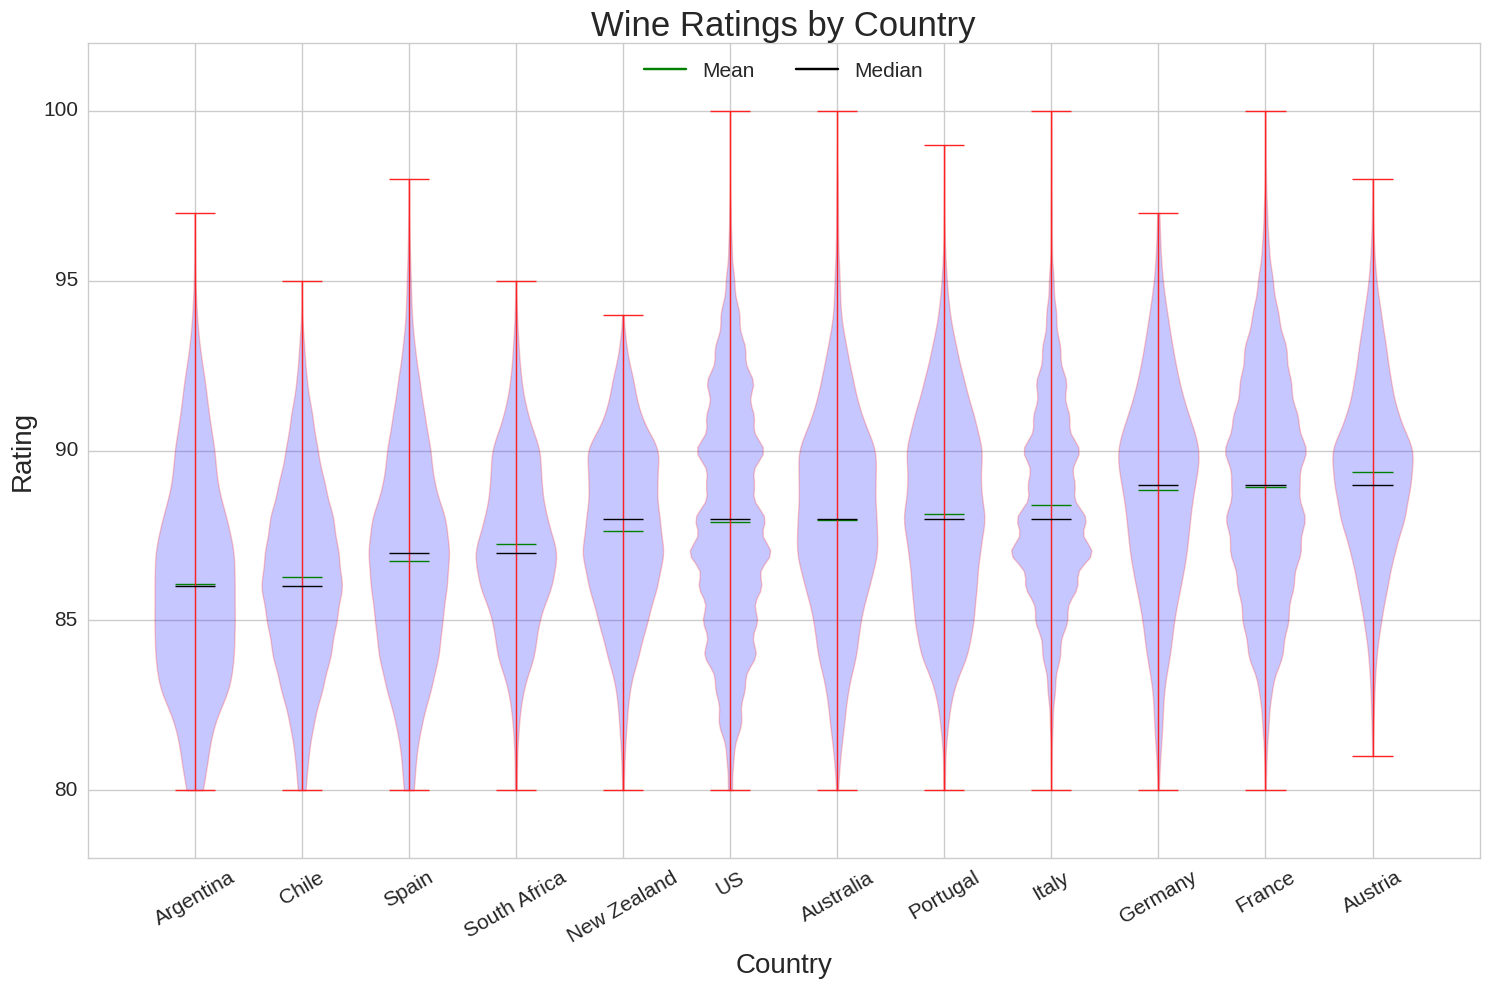

In [7]:
# top_12_countries = list(df_wine.groupby('country')[['province']].count()\
#                             .sort_values(by='province',ascending=False).head(12).index)
# top_12_countries.sort()

top_12_countries = np.array(df_wine.groupby('country')[['province']].count()\
                            .sort_values(by='province',ascending=False).head(12).index)

a = df_wine.groupby('country')[['points']].mean()
a = a[a.index.isin(top_12_countries)]
top_12_countries = list(a.index[np.argsort(np.array(a['points']))])

data = [np.array( df_wine[df_wine['country'] == country]['points'] ) for country in top_12_countries]

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

ax.set_xticks(pos)
ax.set_xticklabels(top_12_countries, rotation = 30)
ax.set_xlabel("Country", fontsize = 20)
# ax.set_xticklabels(top_12_countries, rotation = "vertical")
# ax.set_xticklabels(top_12_countries, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_xlim((-1,12))

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by Country", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)    

plt.tight_layout()
plt.show()
fig.savefig("images/countries_violin.png")

In [8]:
df = df_wine[df_wine['price'].notnull()]
df = df[['price', 'points']]
df.sort_values(by=['price', 'points'], inplace=True)

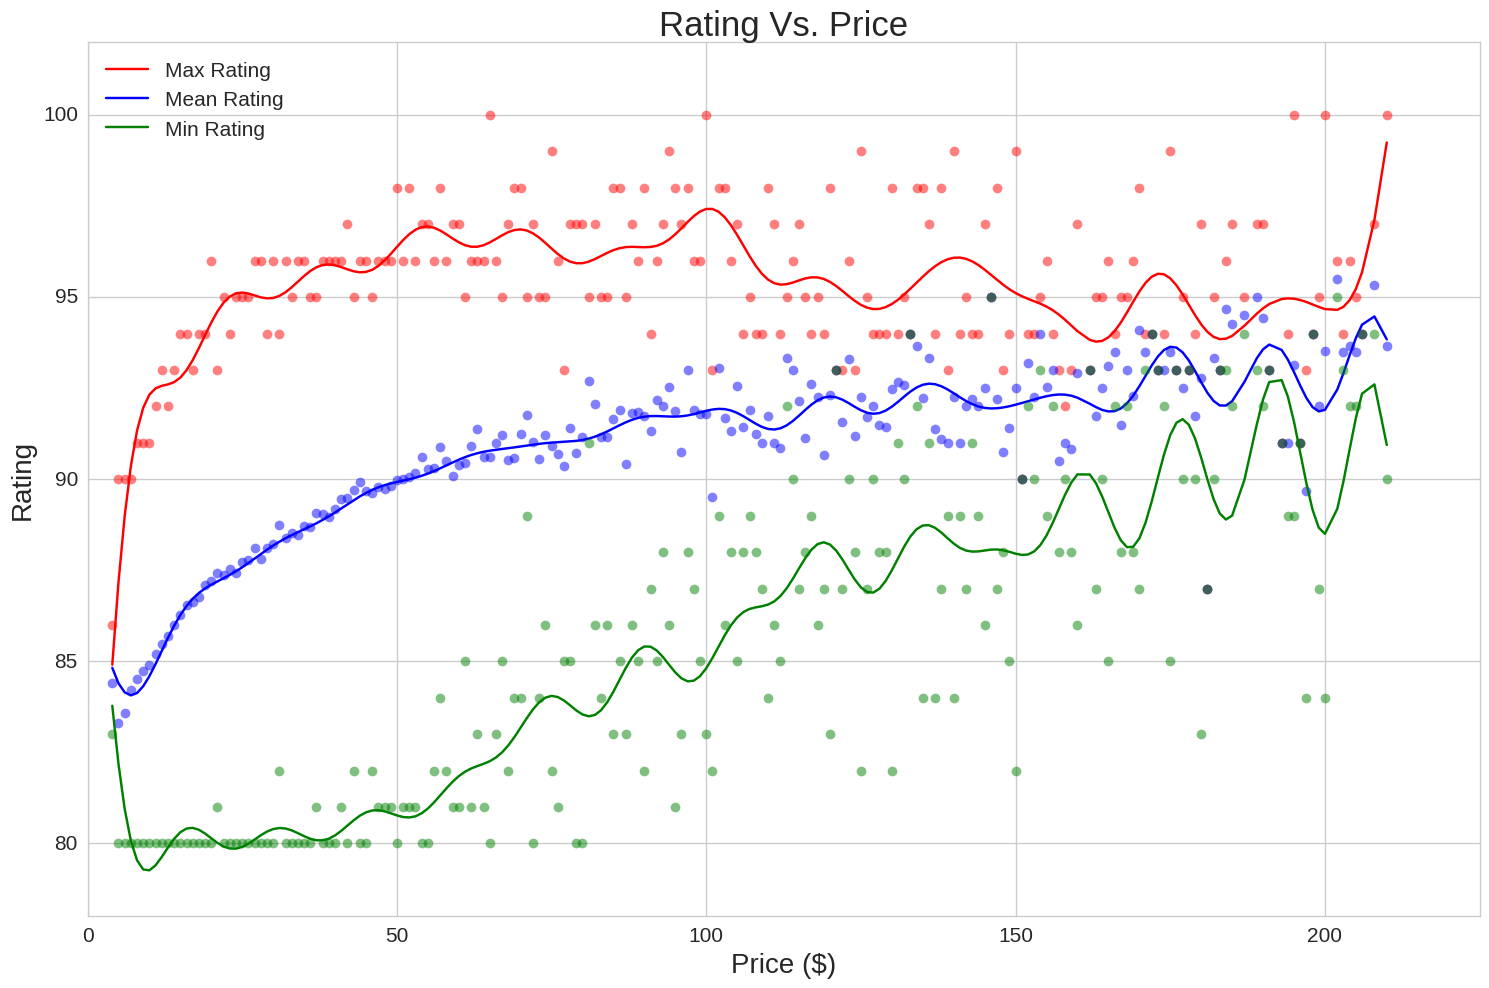

In [10]:
xx = np.array(df['price'].unique())[:200]
yy_mean = np.array(df.groupby('price').mean())[:,0][:200]
yy_max = np.array(df.groupby('price').max())[:,0][:200]
yy_min = np.array(df.groupby('price').min())[:,0][:200]

ffs_mean = FFS(xx,yy_mean,len(xx))
ffs_max = FFS(xx,yy_max,len(xx))
ffs_min = FFS(xx,yy_min,len(xx))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.plot(xx, yy_max, 'ro', alpha = 0.5)
ax.plot(xx, ffs_max.evaluate(xx,30), 'r', label="Max Rating")

ax.plot(xx, yy_mean, 'bo', alpha = 0.5)
ax.plot(xx, ffs_mean.evaluate(xx,30), 'b', label="Mean Rating")

ax.plot(xx, yy_min, 'go', alpha = 0.5)
ax.plot(xx, ffs_min.evaluate(xx,30), 'g', label="Min Rating")

ax.set_xlabel("Price ($)", fontsize=20)
ax.set_xlim((0,225))

ax.set_ylabel("Rating", fontsize=20)
ax.set_ylim((78,102))

ax.tick_params(labelsize=15)

ax.set_title("Rating Vs. Price", fontsize = 25)

ax.legend(loc = "upper left", ncol = 1, fontsize = 15) 

plt.tight_layout()
plt.show()
fig.savefig("images/rating_vs_price.png")

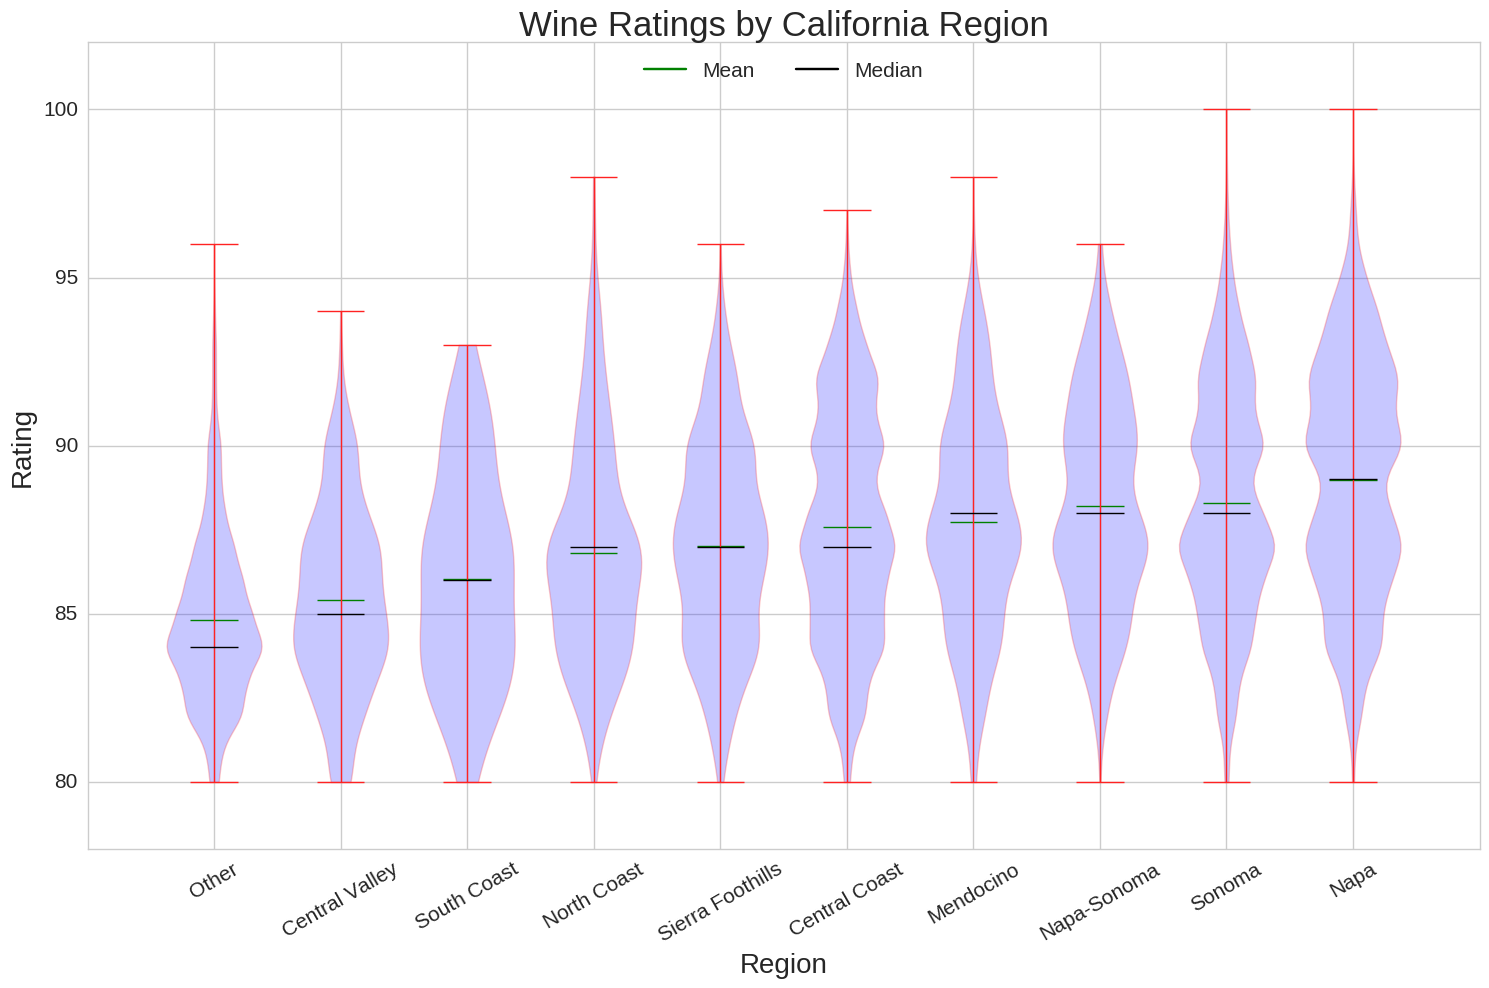

In [13]:
# cali_regions = sorted(list(df_wine[df_wine['province'] == "California"]['region_2'].unique())[:-2])
cali_regions = np.array(df_wine[df_wine['province'] == "California"]['region_2'].unique())[:-2]

a = df_wine[df_wine['province'] == "California"].groupby('region_2')[['points']].mean()
a = a[a.index.isin(cali_regions)]
cali_regions = list(a.index[np.argsort(np.array(a['points']))])

data = [np.array( df_wine[df_wine['region_2'] == region]['points'] ) for region in cali_regions]

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

cali_regions[-4] = 'Mendocino'
cali_regions[0] = "Other"

ax.set_xticks(pos)
ax.set_xticklabels(cali_regions, rotation = 30)
ax.set_xlabel("Region", fontsize = 20)
# ax.set_xticklabels(top_12_countries, rotation = "vertical")
# ax.set_xticklabels(top_12_countries, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_xlim((-1,10))

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by California Region", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)    

plt.tight_layout()
plt.show()
fig.savefig("images/cali_violin.png")

In [14]:
df_wine[df_wine['points'] == 100.][['price']].sort_values(by='price')

,price
18563,65.0
78150,100.0
27520,195.0
73733,200.0
84409,210.0
75150,215.0
86124,245.0
18564,300.0
23360,460.0
2068,848.0


In [15]:
df_wine[df_wine['country'] == 'US']['province'].unique()

array(['California', 'Oregon', 'Washington', 'Idaho', 'New York',
       'Virginia', 'Colorado', 'Arizona', 'America', 'North Carolina',
       'New Mexico', 'Missouri', 'Pennsylvania', 'Ohio', 'Massachusetts',
       'New Jersey', 'Michigan', 'Texas', 'Washington-Oregon', 'Iowa',
       'Vermont', 'Connecticut', 'Kentucky', 'Nevada'], dtype=object)

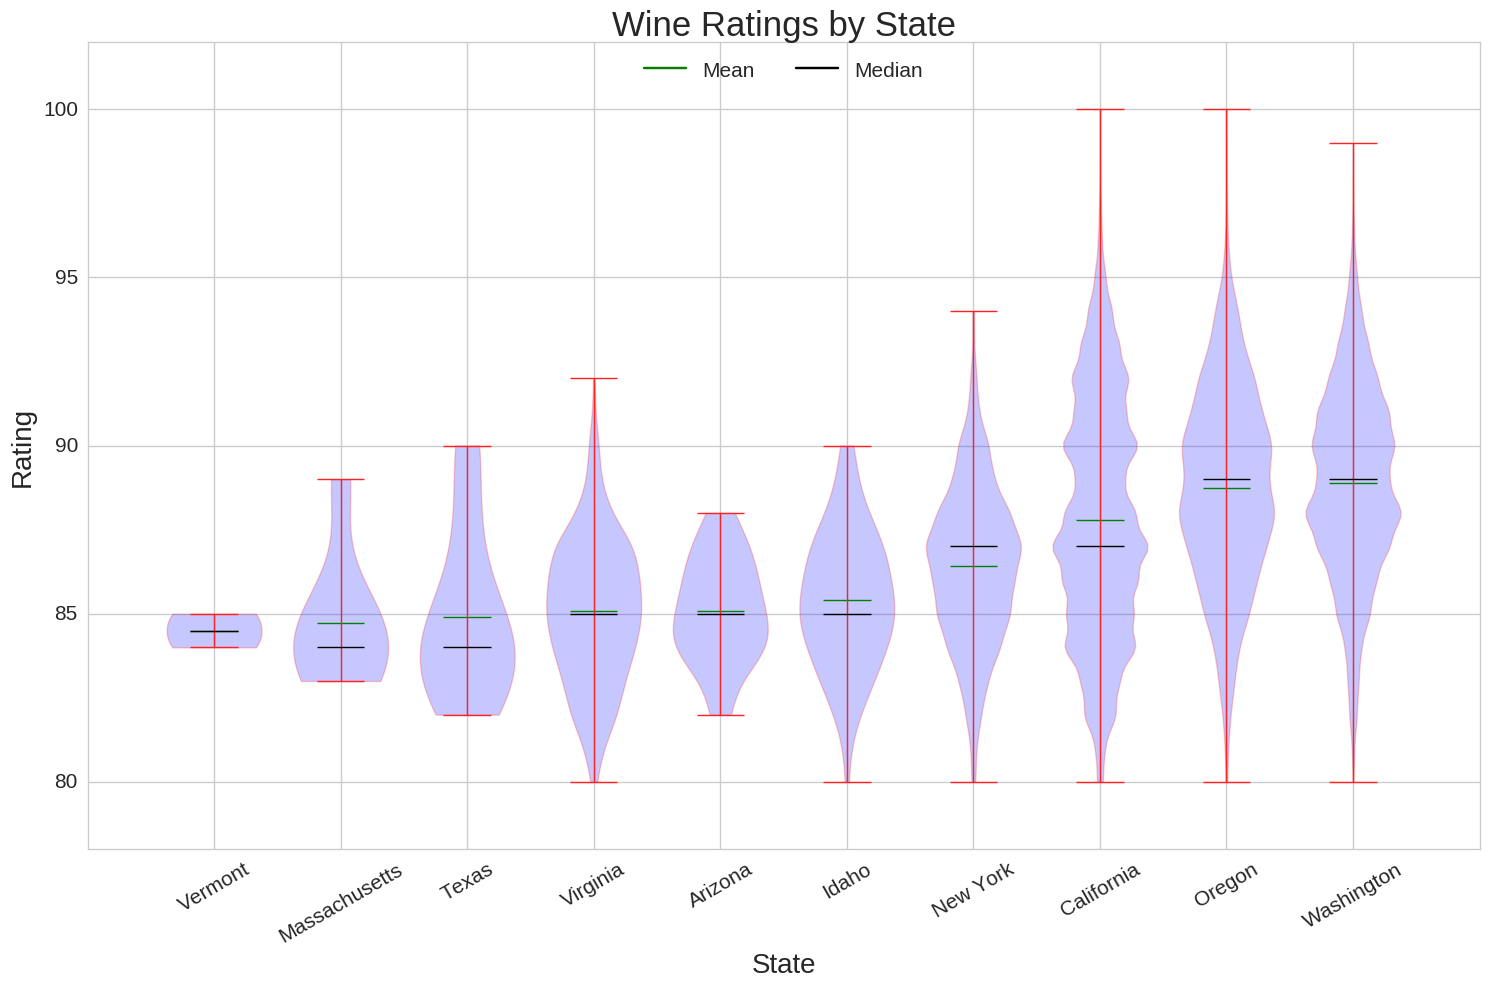

In [22]:

a = df_wine[df_wine['country'] == 'US'].groupby('province')[['points']].mean()
states = list(a.index[np.argsort(np.array(a['points']))])
states = states[-12:]
states.pop(-4)
states.pop(-4)

data = [np.array( df_wine[df_wine['province'] == state]['points'] ) for state in states]

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

states
ax.set_xticks(pos)
ax.set_xticklabels(states, rotation = 30)
ax.set_xlabel("State", fontsize = 20)
# ax.set_xticklabels(top_12_countries, rotation = "vertical")
# ax.set_xticklabels(top_12_countries, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_xlim((-1,10))

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by State", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)    

plt.tight_layout()
plt.show()
fig.savefig("images/states_violin.png")

In [26]:
df_wine['variety'].unique()[:10]
list(df_wine.groupby('variety')[['points']].count()\
                 .sort_values(by="points", ascending=False).head(12).index)

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Sauvignon Blanc',
 'Syrah',
 'Riesling',
 'Merlot',
 'Zinfandel',
 'Sangiovese',
 'Malbec']

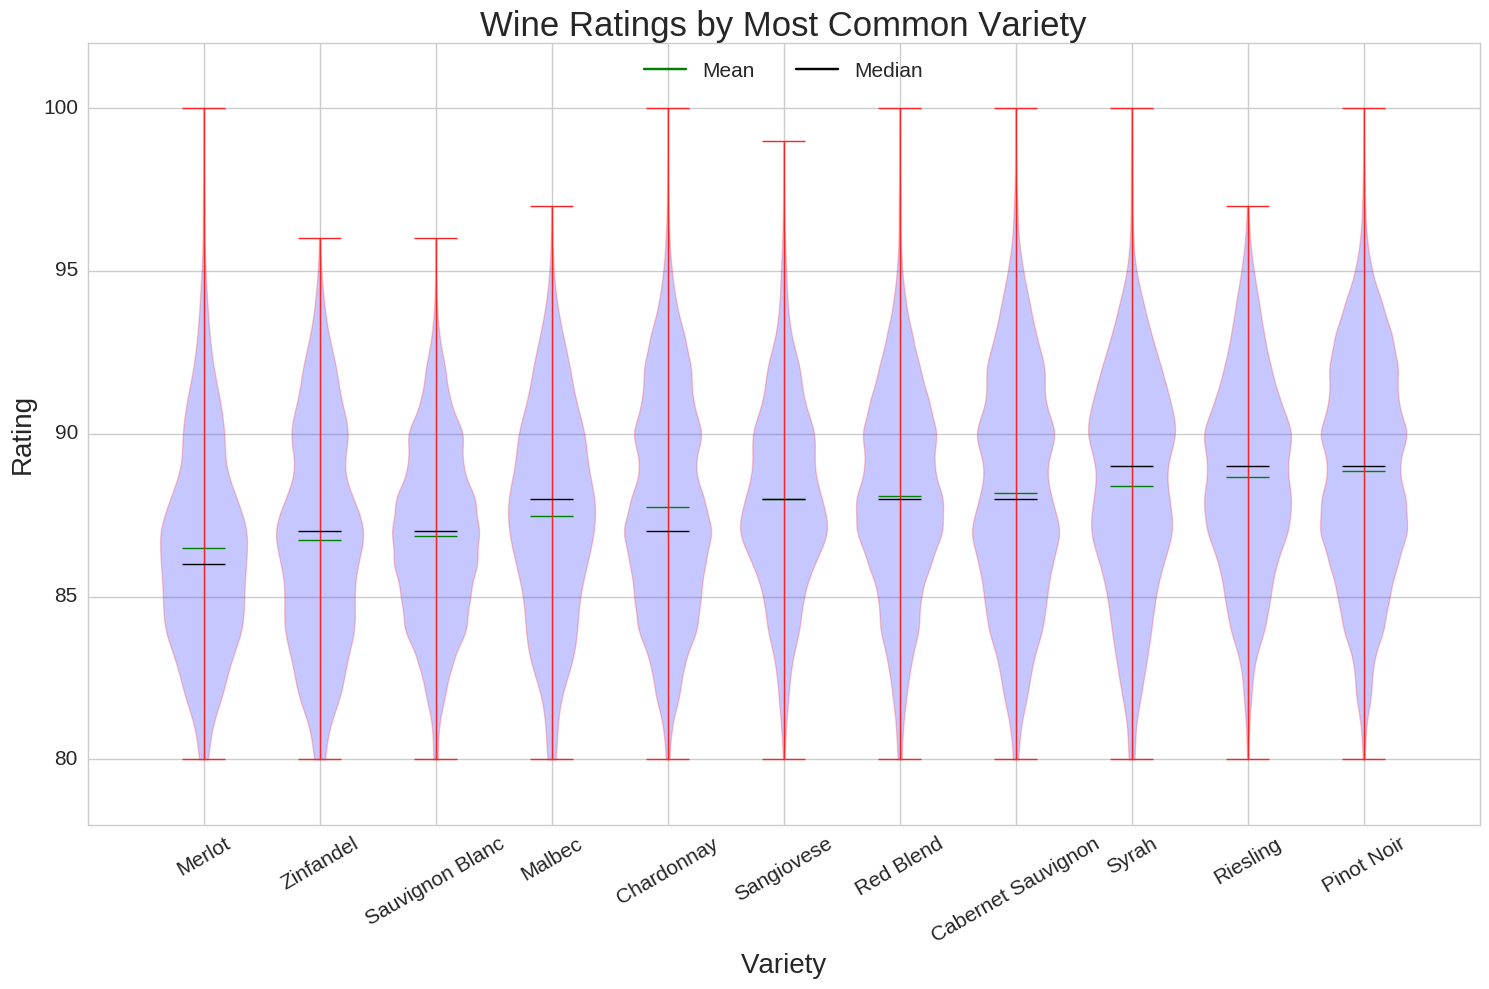

In [28]:

varieties = list(df_wine.groupby('variety')[['points']].count()\
                 .sort_values(by="points", ascending=False).head(12).index)
varieties.pop(4)
varieties = np.array(varieties)

a = df_wine.groupby('variety')[['points']].mean()
a = a[a.index.isin(varieties)]
varieties = list(a.index[np.argsort(np.array(a['points']))])

data = [np.array( df_wine[df_wine['variety'] == variety]['points'] ) for variety in varieties]

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

ax.set_xticks(pos)
ax.set_xticklabels(varieties, rotation = 30)
ax.set_xlabel("Variety", fontsize = 20)
# ax.set_xticklabels(top_12_countries, rotation = "vertical")
# ax.set_xticklabels(top_12_countries, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_xlim((-1,11))

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by Most Common Variety", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)    

plt.tight_layout()
plt.show()
fig.savefig("images/variety_violin.png")

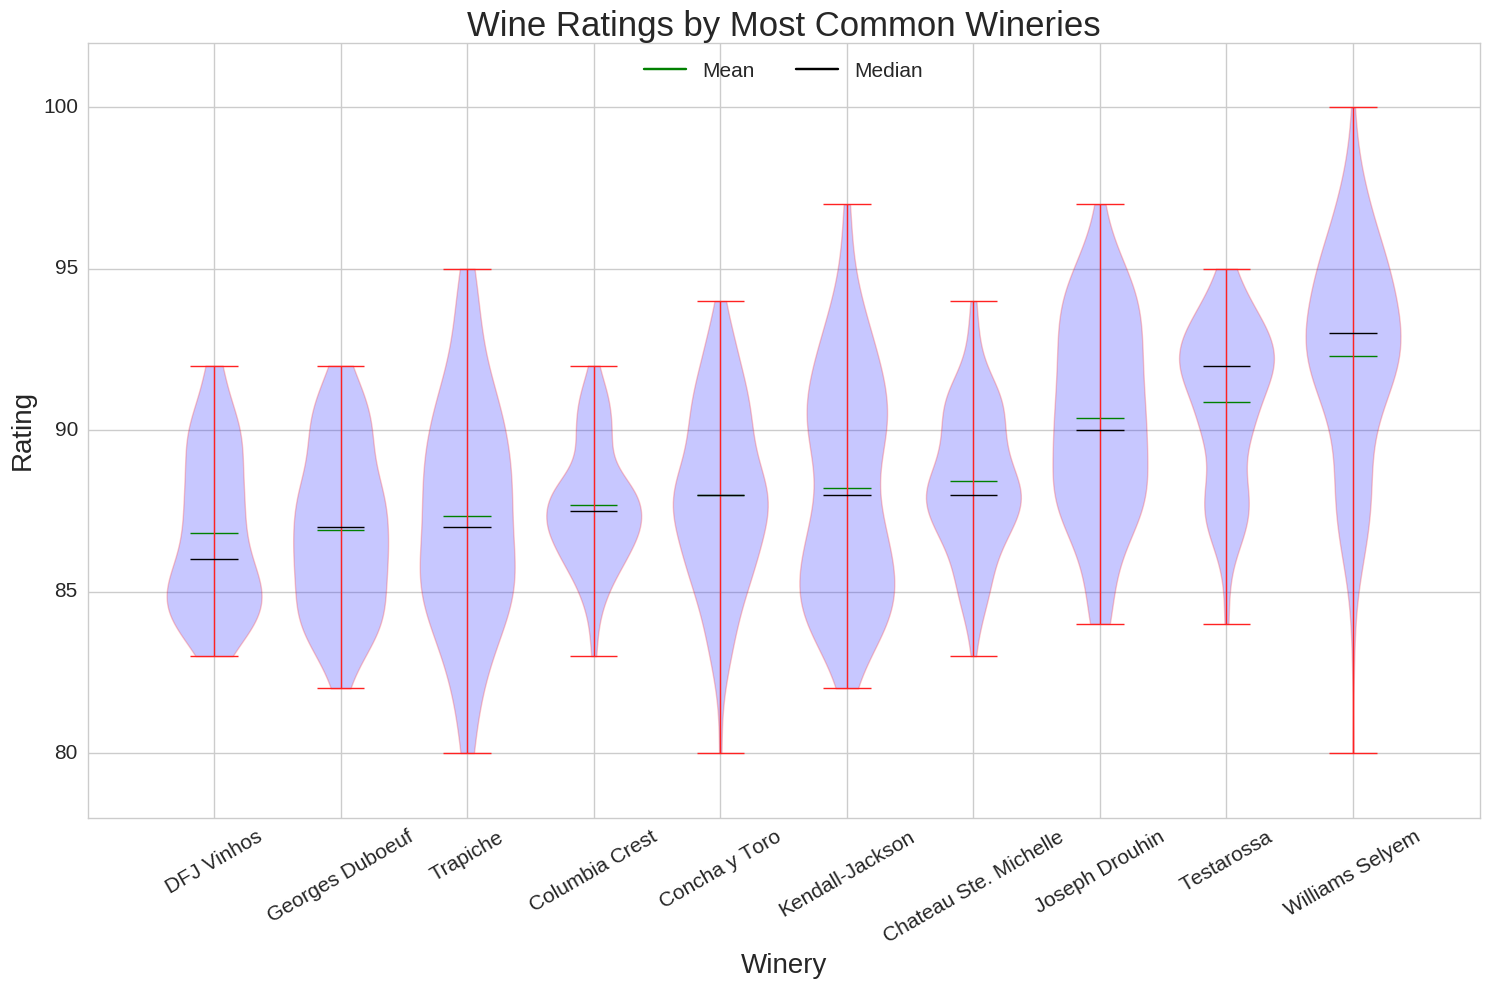

In [31]:
wineries = np.array(df_wine.groupby('winery')[['points']].count()\
                 .sort_values(by="points", ascending=False).head(10).index)
a = df_wine.groupby('winery')[['points']].mean()
a = a[a.index.isin(wineries)]
wineries = list(a.index[np.argsort(np.array(a['points']))])

data = [np.array( df_wine[df_wine['winery'] == winery]['points'] ) for winery in wineries]

width = 0.75
pos = np.arange(0,len(data))

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

violin_parts = ax.violinplot(data, pos, showmeans = True, showextrema=True, showmedians=True, widths = width)
ax.plot([0,0], 'g-', label="Mean")
ax.plot([0,0], 'k-', label="Median")

ax.set_xticks(pos)
ax.set_xticklabels(wineries, rotation = 30)
ax.set_xlabel("Winery", fontsize = 20)
# ax.set_xticklabels(top_12_countries, rotation = "vertical")
# ax.set_xticklabels(top_12_countries, fontsize = 15)
# ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_xlim((-1,10))

ax.set_ylim((78,102))
ax.set_ylabel("Rating", fontsize = 20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Ratings by Most Common Wineries", fontsize = 25)


rrred = '#ff2222'
bluuu = '#2222ff'

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)

violin_parts['cmedians'].set_edgecolor('k')
violin_parts['cmedians'].set_linewidth(1)

violin_parts['cmeans'].set_edgecolor('g')
violin_parts['cmeans'].set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor(bluuu)
    vp.set_edgecolor(rrred)
    vp.set_linewidth(1)
    vp.set_alpha(0.25)

ax.legend(loc = "upper center", ncol = 2, fontsize = 15)    

plt.tight_layout()
plt.show()
fig.savefig("images/winery_violin.png")

In [15]:
df_wine[df_wine['winery'] == "Kenwood"].sort_values(by = 'points', ascending=False).shape

(191, 11)

In [33]:
scores = np.array(pd.read_csv("data/scores.csv")['points'])

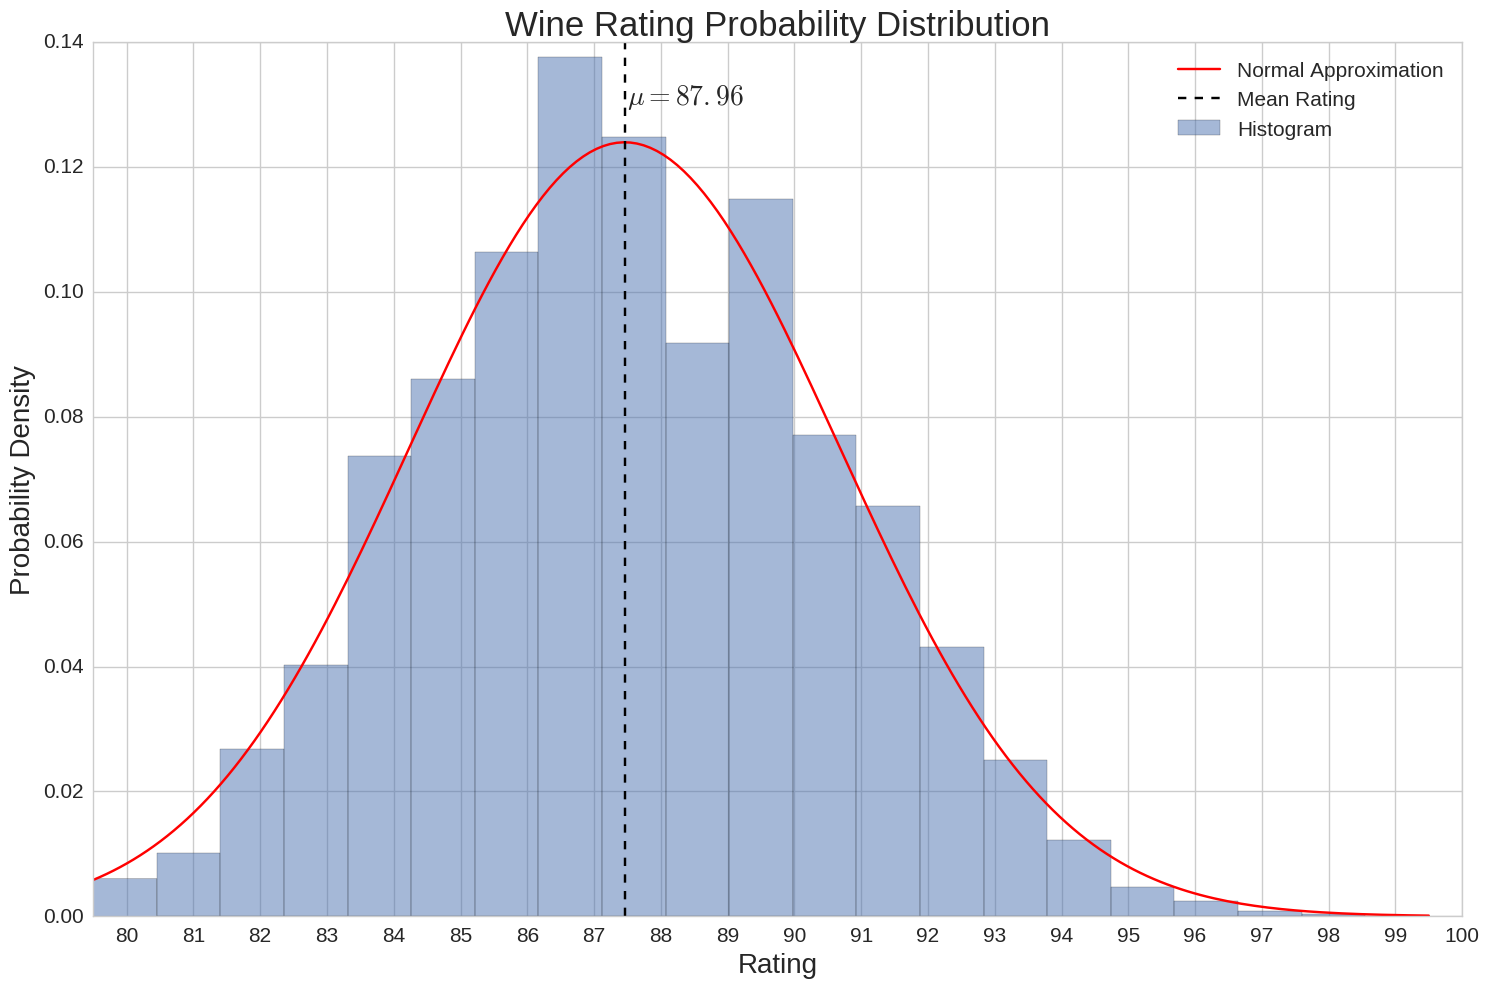

In [40]:

x_range = np.linspace(80,100,200)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.hist(scores, bins=21, normed=True, label='Histogram', alpha=0.5)
ax.plot(x_range, sps.norm.pdf(x_range, loc=np.mean(scores), scale=np.std(scores)), 'r-', label='Normal Approximation')
ax.axvline(x = np.mean(scores), color='k', linestyle='--', label='Mean Rating')

# ax.set_xticks(np.arange(80,101))
ax.set_xticks(0.5 + np.arange(80,101))
ax.set_xticklabels(np.arange(80,101))
ax.set_xlabel("Rating", fontsize=20)

ax.set_ylabel("Probability Density", fontsize=20)

ax.tick_params(labelsize=15)

ax.set_title("Wine Rating Probability Distribution", fontsize = 25)

ax.text(88, 0.13, '$\mu = {0}$'.format(round(np.mean(scores), 2)), fontsize = 20)
ax.legend(loc = "upper right", fontsize = 15)

plt.tight_layout()
fig.show()
fig.savefig("images/rating_pdf.png")